# $$Marketing~Analytics: ~K-means$$

### $$CONCEITO:$$

**Processo consiste em segmentar os clientes e potenciais clientes em grupos de afinidade.**

**Com a segmentação, sua equipe conseguirá oferecer um atendimento mais assertivo e personalizado às pessoas**

**Uma das maiores vantagens da segmentação de clientes é a possibilidade de você conhecer a fundo os diferentes perfis de consumidores da sua empresa.**

**A segmentação também permite que você tenha mais sucesso ao oferecer suas soluções aos clientes, pois elas serão direcionadas pelo perfil traçado no momento da organização dos segmentos de afinidade.**

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

## $$Objetivo:$$  


## $$Segmentar~ os~clientes ~de~ uma ~rede~ de~ restaurante ~Food ~Delivery~pelos ~ itens~comprados ~$$

__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__


__------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------__

In [1]:
#Carregar os pacotes
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib as m
import matplotlib.pyplot as plt

# Base de Dados 

In [2]:
# Carrega o dataset
dados = pd.read_csv("dados/dataset.csv", encoding = 'utf-8',sep=';')
dados

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item
0,0x7901ee,16/01/2019 18:33,7,bebida,2
1,0x7901ee,16/01/2019 18:33,7,pizza,2
2,0x7901ee,16/01/2019 18:33,7,sobremesa,2
3,0x12b47f,04/09/2019 12:36,3,salada,1
4,0x12b47f,04/09/2019 12:36,3,sobremesa,1
...,...,...,...,...,...
260640,0x75ab27,03/04/2019 11:31,5,sobremesa,1
260641,0x560060,09/08/2019 00:23,6,pizza,2
260642,0x560060,09/08/2019 00:23,6,sobremesa,2
260643,0x132dce,22/08/2019 13:41,7,salada,1


**Dataset contém 260.645 registros e 5 variáveis.**

# Dicionário de Dados



### $$Variáveis:$$

- **Id_transacao:** Código de identificação do pedido, pode haver o mesmo ID com varios itens pedidos.


- **Horario_pedido:** Horário do pedido 


- **Localidade:** Número da Unidade do Restaurante


- **Nome_item:** Nome do Item pedido


- **Quantidade_item:** Quantidade de itens pedidos


# Análise Exploratória

In [3]:
# Verificar se existe valores nulos
dados.isnull().sum()

id_transacao       0
horario_pedido     0
localidade         0
nome_item          0
quantidade_item    0
dtype: int64

In [4]:
#Verificar se existe dados duplicados
sum(dados.duplicated())

0

In [5]:
# Tipos de dados nas colunas
dados.dtypes

id_transacao       object
horario_pedido     object
localidade          int64
nome_item          object
quantidade_item     int64
dtype: object

**A variavel 'horario_pedido' pode ser transformada em datatime para tirar insights das vendas em relação ao tempo, porém para o objetivo desse projeto não será necessário**

In [6]:
# Resumo da coluna 'quantidade_item'
pd.DataFrame(dados.quantidade_item.describe())

,quantidade_item
count,260645.000000
mean,2.447010
std,1.330863
min,1.000000
25%,1.000000
50%,2.000000
75%,4.000000
max,5.000000


**Observamos que não existe nenhum produto com 0 pedido, o máximo de pedido de um produto é 5 unidades e a média de itens pedidos é 2.44**

In [7]:
# Verifica o total de valores únicos por coluna
dados.nunique()

id_transacao       100000
horario_pedido      76799
localidade              9
nome_item               4
quantidade_item         5
dtype: int64

**A coluna 'id_transacao' contém 100.000 transações únicas, porém o dataset mostra 260.645 registros, portanto caso uma única transação houver 2 ou mais pedidos, vai ser adicionado mais registros do mesmo pedido em outras linhas, temos que converter o dataframe em uma tabela pivot para resolver o problema** 

In [8]:
#Numero de Id de transação por pedido
dados.groupby('id_transacao')['horario_pedido'].count()

id_transacao
0x10000a    2
0x100058    2
0x1000c8    4
0x10014c    2
0x1001d8    3
           ..
0xffe96     3
0xffeed     2
0xfff07     3
0xfff4d     2
0xfffb8     2
Name: horario_pedido, Length: 100000, dtype: int64

**Note que há várias transações do mesmo pedido em outros linhas da tabela**

In [9]:
#Filtrando o  pedido de id = '0x1000c8'
dados[dados.id_transacao=='0x1000c8']

,id_transacao,horario_pedido,localidade,nome_item,quantidade_item
21516,0x1000c8,28/01/2019 19:24,9,bebida,4
21517,0x1000c8,28/01/2019 19:24,9,pizza,4
21518,0x1000c8,28/01/2019 19:24,9,salada,1
21519,0x1000c8,28/01/2019 19:24,9,sobremesa,5


**Observe que 1 pedido está sendo registrado por 4 linhas**

# Tabela pivot

In [10]:
# tabela pivot com id_transacao, nome_item e quantidade_item
df_pivot = dados.pivot_table(index = ['id_transacao'], columns = ['nome_item'], values = 'quantidade_item')
df_pivot

nome_item,bebida,pizza,salada,sobremesa
id_transacao,,,,
0x10000a,NaN,1.0,NaN,1.0
0x100058,NaN,2.0,NaN,2.0
0x1000c8,4.0,4.0,1.0,5.0
0x10014c,NaN,1.0,NaN,1.0
0x1001d8,3.0,3.0,NaN,3.0
...,...,...,...,...
0xffe96,4.0,4.0,NaN,4.0
0xffeed,NaN,1.0,NaN,1.0
0xfff07,1.0,1.0,NaN,1.0


**Usamos 3 colunas para criar a tabela pivot: 'id_transacao', 'nome_item' e 'quantidade_item', os valores atribuídos são as quantidades de pedidos daqueles itens, e os valores NaN significa que não houve pedido daquele produto naquela transação** 

In [11]:
# Substituir os valores NA gerados no pivot, por 0 e transformar o índice 'id_transacao' em coluna
df_pivot = df_pivot.fillna(0).reset_index()
df_pivot

nome_item,id_transacao,bebida,pizza,salada,sobremesa
0,0x10000a,0.0,1.0,0.0,1.0
1,0x100058,0.0,2.0,0.0,2.0
2,0x1000c8,4.0,4.0,1.0,5.0
3,0x10014c,0.0,1.0,0.0,1.0
4,0x1001d8,3.0,3.0,0.0,3.0
...,...,...,...,...,...
99995,0xffe96,4.0,4.0,0.0,4.0
99996,0xffeed,0.0,1.0,0.0,1.0
99997,0xfff07,1.0,1.0,0.0,1.0
99998,0xfff4d,0.0,2.0,0.0,2.0


In [12]:
#Verificar valores nulos
df_pivot.isnull().sum()

nome_item
id_transacao    0
bebida          0
pizza           0
salada          0
sobremesa       0
dtype: int64

**Todos os valores NaN foram substituidos por 0**

In [13]:
#Verificar se existe dados duplicados
sum(df_pivot.duplicated())

0

**Com a transformação da tabela poderíamos ter adicionado valores nulos ou duplicados**

In [14]:
#Filtrando o  pedido de id = '0x1000c8' agora com a tabela pivot
df_pivot[df_pivot.id_transacao=='0x1000c8']

nome_item,id_transacao,bebida,pizza,salada,sobremesa
2,0x1000c8,4.0,4.0,1.0,5.0


**Note que o mesmo Id de pedido mostrado no script 35 agora está representado em apenas 1 linha**

In [15]:
 #Verifica o total de valores únicos por coluna
df_pivot.nunique()

nome_item
id_transacao    100000
bebida               6
pizza                6
salada               6
sobremesa            5
dtype: int64

**Agora que incluímos o registro 0 na quantidade de itens, temos até 6 possibilidade de pedidos**

In [16]:
# Resumo das quantidades de pedidos por itens
df_pivot.describe()

nome_item,bebida,pizza,salada,sobremesa
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.239590,1.857840,0.711370,2.569210
std,1.627886,1.588589,1.086524,1.332084
min,0.000000,0.000000,0.000000,1.000000
25%,0.000000,1.000000,0.000000,1.000000
50%,0.000000,1.000000,0.000000,2.000000
75%,3.000000,3.000000,1.000000,4.000000
max,5.000000,5.000000,5.000000,5.000000


**O produto mais pedido pelos clientes é a sobremesa e o menos pedido é a salada**

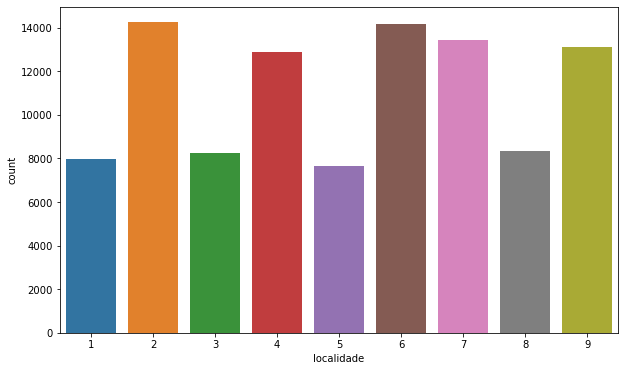

In [17]:
# Incluir a coluna localidade e verificar se existe alguma região onde há mais pedidos dos itens
import warnings
warnings.filterwarnings('ignore')

df_loc = df_pivot.join(dados.localidade)
df_loc = df_loc[['id_transacao', 'localidade']]
plt.figure(1 , figsize = (10 , 6))
sns.countplot(df_loc.localidade);

**As localidade 2 e 6 são as que tem as medias mais altas de pedidos, já as localidade 1,3,5 e 8 são as que tem menos pedidos, poderíamos verificar quais itens e períodos são mais relevantes para cada localidade, porém para esse mini-projeto não será incluído esses insights**

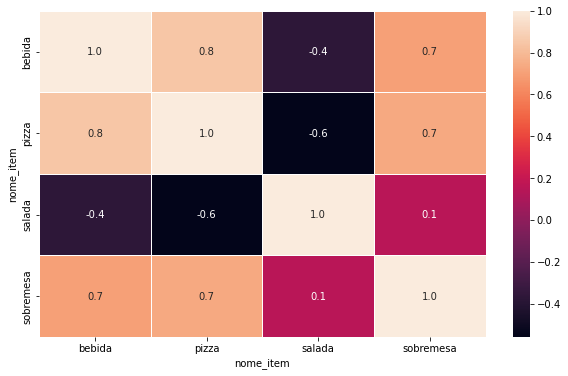

In [18]:
#Correlação entre os itens
plt.figure(1 , figsize = (10 , 6))
plot = sns.heatmap(df_pivot.drop(['id_transacao'],axis=1).corr(), annot = True, fmt=".1f", linewidths=.6)

**As maiores correlações positivas são: (Pizza e bebida), seguida por (Bebida e sobremesa) e a maior correlação negativa é entre (Salada e Pizza), observe que a salada ou tem correlação negativa ou não tem correlação com os itens**

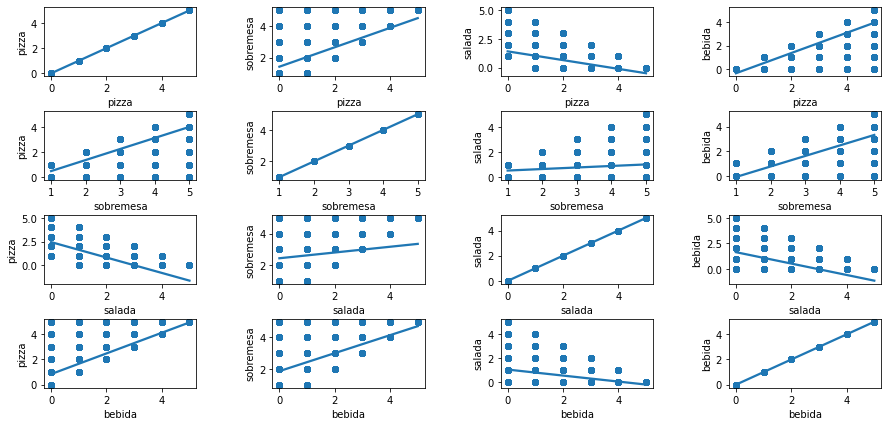

In [19]:
# Correlação Entre os Atributos usando Regplot

# Tamanho da figura
plt.figure(1 , figsize = (15 , 7))

# Inicializa o contador
n = 0 

# Loop pelos atributos
for x in ['pizza' , 'sobremesa' , 'salada', 'bebida']:
    for y in ['pizza' , 'sobremesa' , 'salada', 'bebida']:
        n += 1
        plt.subplot(4 , 4 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = df_pivot)
        plt.ylabel(y)
plt.show()

**Verificando a correlação entre os itens com uma regressão linear simples**

# Análise de Cluster com K-means

**Com base nas correlações mais fortes, faremos 3 tipos de segmentação: 1° (Pizza e Bebida), 2°(Bebida e Sobremesa), 3°(Pizza, Bebida e sobremesa)**

## Segmentação 1: Pizza e Bebida

In [20]:
#Criar um array para as colunas pizza e bebida
s1 = df_pivot[['pizza' , 'bebida']].iloc[: , :].values
s1

array([[1., 0.],
       [2., 0.],
       [4., 4.],
       ...,
       [1., 1.],
       [2., 0.],
       [1., 0.]])

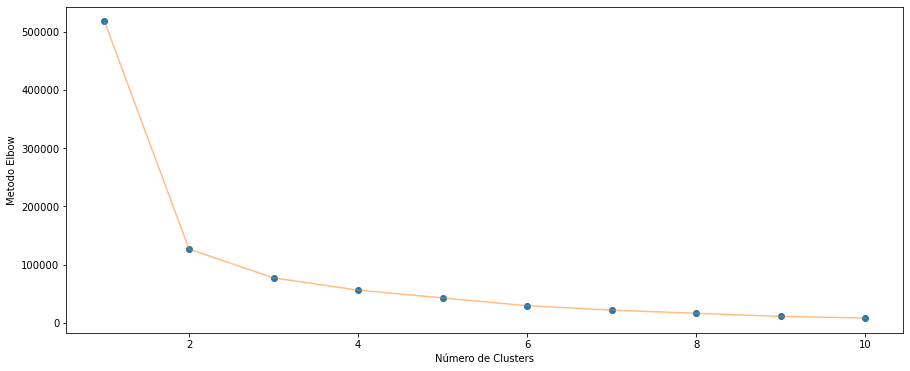

In [21]:
#Definir o melhor valor de Clusters (Metodo Elbow)
from sklearn.cluster import KMeans

c1_elbow = []
# Loop para testar os valores de K
for n in range(1, 11):
    modelo1 = (KMeans(n_clusters = n,
                     init = 'k-means++', 
                     n_init = 10,
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan'))
    modelo1.fit(s1)
    c1_elbow.append(modelo1.inertia_)
    
    
# Plot
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , c1_elbow , 'o')
plt.plot(np.arange(1 , 11) , c1_elbow , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Metodo Elbow')
plt.show();

In [22]:
#Porcentagem de variancia dentro do cluster
p = []
a = 0
for i in range(0,10):
    res = round(c1_elbow[a]/(sum(c1_elbow))*100,1)
    p.append(res)
    a+=1
dt =pd.DataFrame(p,columns=['% de Variação'])
dt['Clusters'] = range(1,11)
dt

,% de Variação,Clusters
0,57.1,1
1,14.0,2
2,8.5,3
3,6.2,4
4,4.7,5
5,3.2,6
6,2.4,7
7,1.8,8
8,1.2,9
9,0.9,10


**De 2 a 3 clusters parece ser um número adequado**

**OBS: Não existe somente um valor correto para definir o número de clusters que pode ser usado, temos que alinhar principalmente com a área de marketing para saber qual o valor monetário total que será usado para a campanha, decidir qual o tipo de público que a campanha quer atingir, entre outros requisitos, só assim conseguimos definir o número de clusters**

## Segmentação 1 - Construindo e Treinando o Modelo

- Vamos utilizar 3 clusters para construção do modelo

In [23]:
# Criação do modelo
modelo_seg1 = KMeans(n_clusters = 3, 
                     init = 'k-means++', 
                     n_init = 10, 
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan')

# Treinamento do modelo
modelo_seg1.fit(s1)

KMeans(algorithm='elkan', n_clusters=3, random_state=111)

In [24]:
# Extração dos labels
labels1 = modelo_seg1.labels_
labels1

array([2, 0, 1, ..., 2, 0, 2])

## Segmentação 1 - Visualização e Interpretação dos Clusters

In [25]:
#Add os clusters no dataframe
s1_cluster = df_pivot[['pizza' , 'bebida']]
s1_cluster['Clusters'] = labels1

#Add a coluna id_transacao
s1_cluster['id_transacao'] = df_pivot['id_transacao']
s1_cluster[['id_transacao','pizza','bebida','Clusters']]

nome_item,id_transacao,pizza,bebida,Clusters
0,0x10000a,1.0,0.0,2
1,0x100058,2.0,0.0,0
2,0x1000c8,4.0,4.0,1
3,0x10014c,1.0,0.0,2
4,0x1001d8,3.0,3.0,1
...,...,...,...,...
99995,0xffe96,4.0,4.0,1
99996,0xffeed,1.0,0.0,2
99997,0xfff07,1.0,1.0,2
99998,0xfff4d,2.0,0.0,0


**Agora no dataset temos o id_transacao, os pedidos feitos e a segmentação dos clientes representadas pelos valores na coluna Clusters**

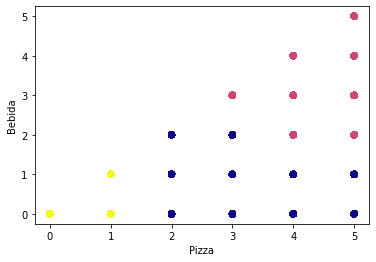

In [26]:
#Plot dos clusters
plt.scatter(s1_cluster.pizza,s1_cluster.bebida,c=s1_cluster.Clusters,cmap="plasma");
plt.xlabel('Pizza');
plt.ylabel('Bebida');


### **Interpretação**: 


- **Cluster 1 (Ponto Amarelo):** Clientes que pediram pouca ou nenhuma Pizza e Bebida.


- **Cluster 2 (Ponto Azul):** Clientes que pediram mais Pizzas e poucas Bebida.


- **Cluster 3 (Ponto Roza):** Clientes que pediram mais Pizzas e mais Bebida.

### **Análise**:
    
- **Em termos de rentabilidade o cluster 1 é o que gera menos receita para empresa, e o cluster 3 é o mais rentável**


- **Para campanha de marketing temos que ter mais variáveis para entender o porquê da diferença tão grande entre os clusters 1 e 3 , se é a renda, primeiro pedido, total de membros na família entre outros requisitos**



## Segmentação 2: Bebida e Sobremesa

In [27]:
#Criar um array para as colunas bebida e sobremesa
s2 = df_pivot[['sobremesa' , 'bebida']].iloc[: , :].values
s2

array([[1., 0.],
       [2., 0.],
       [5., 4.],
       ...,
       [1., 1.],
       [2., 0.],
       [1., 0.]])

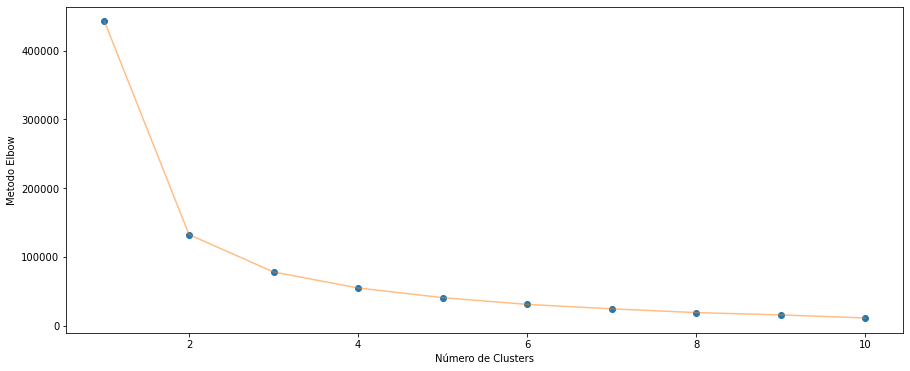

In [28]:
#Definir o melhor valor do Cluster (Metodo Elbow)


# Loop para testar os valores de K
c2_elbow = []


for n in range(1, 11):
    modelo2 = (KMeans(n_clusters = n,
                     init = 'k-means++', 
                     n_init = 10,
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan'))
    modelo2.fit(s2)
    c2_elbow.append(modelo2.inertia_)
    
# Plot
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , c2_elbow , 'o')
plt.plot(np.arange(1 , 11) , c2_elbow , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Metodo Elbow')
plt.show();

In [29]:
#Porcentagem de variancia dentro do cluster
p2 = []
a = 0
for i in range(0,10):
    res2 = round(c2_elbow[a]/(sum(c2_elbow))*100,1)
    p2.append(res2)
    a+=1
dt2 =pd.DataFrame(p2,columns=['% de Variação'])
dt2['Clusters'] = range(1,11)
dt2

,% de Variação,Clusters
0,52.1,1
1,15.6,2
2,9.2,3
3,6.4,4
4,4.8,5
5,3.6,6
6,2.9,7
7,2.2,8
8,1.8,9
9,1.3,10


**Como falado anteriormente não há um número certo de clusters, temos varios fatores para levar em consideração nesta etapa, agora escolheremos 2 clusters**

## Segmentação 2 - Construindo e Treinando o Modelo

In [30]:
# Criação do modelo
modelo_seg2 = KMeans(n_clusters = 2, 
                     init = 'k-means++', 
                     n_init = 10, 
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan')

# Treinamento do modelo
modelo_seg2.fit(s2)

KMeans(algorithm='elkan', n_clusters=2, random_state=111)

In [31]:
# Extração dos labels
labels2 = modelo_seg2.labels_
labels2

array([0, 0, 1, ..., 0, 0, 0])

## Segmentação 2 - Visualização e Interpretação dos Segmentos

In [32]:
#Add os clusters no dataframe
s2_cluster = df_pivot[['sobremesa' , 'bebida']]
s2_cluster['Clusters'] = labels2

#Add a coluna id_transacao
s2_cluster['id_transacao'] = df_pivot['id_transacao']
s2_cluster[['id_transacao','sobremesa','bebida','Clusters']]

nome_item,id_transacao,sobremesa,bebida,Clusters
0,0x10000a,1.0,0.0,0
1,0x100058,2.0,0.0,0
2,0x1000c8,5.0,4.0,1
3,0x10014c,1.0,0.0,0
4,0x1001d8,3.0,3.0,1
...,...,...,...,...
99995,0xffe96,4.0,4.0,1
99996,0xffeed,1.0,0.0,0
99997,0xfff07,1.0,1.0,0
99998,0xfff4d,2.0,0.0,0


**Dataset com a coluna id_transacao, os pedidos feitos e a segmentação dos clientes representadas pelos valores na coluna Clusters**

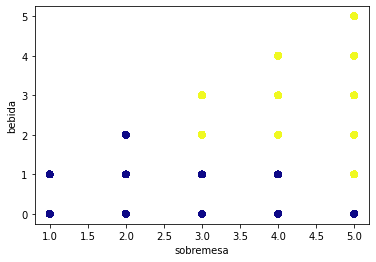

In [33]:
#Plot dos clusters 
plt.scatter(s2_cluster.sobremesa,s2_cluster.bebida,c=s2_cluster.Clusters,cmap="plasma");
plt.xlabel('sobremesa');
plt.ylabel('bebida');

### **Interpretação**: 


- **Cluster 1 (Ponto Azul):** Clientes que pediram pouca ou nenhuma Bebida e Sobremesa.


- **Cluster 2 (Ponto Amarelo):** Clientes que pediram mais sobremesa e bebida.




### **Análise**:
    
- **Em termos de rentabilidade o cluster 1 é o que gera menos receita para empresa em comparação com o cluster número 2**


- **Para campanha de marketing será interessante entender o que leva os clientes do cluster número 2 a pedirem sempre bebida com sobremesa e fazer uma campanha que incentive os clientes de cluster número 1 a comprarem mais bebidas quando comprarem sobremesa**



## Segmentação 3: Pizza, Bebida e Sobremesa

In [34]:
#Criar um array para as colunas Pizza, bebida e sobremesa
s3 = df_pivot[['pizza','sobremesa' , 'bebida']].iloc[: , :].values
s3

array([[1., 1., 0.],
       [2., 2., 0.],
       [4., 5., 4.],
       ...,
       [1., 1., 1.],
       [2., 2., 0.],
       [1., 1., 0.]])

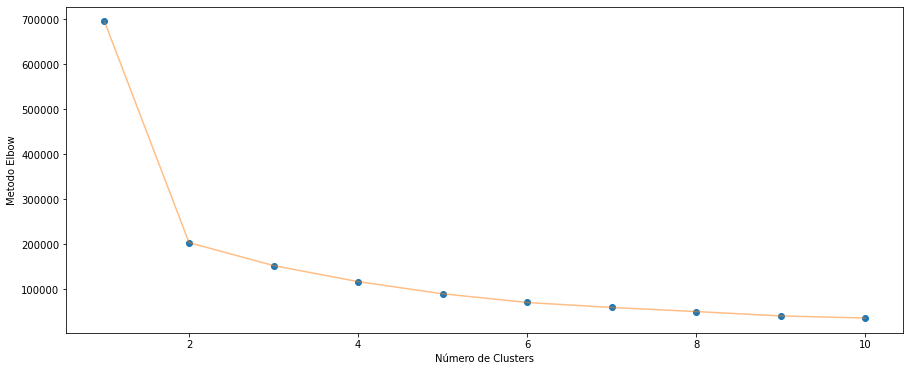

In [35]:
#Definir o valor de Clusters (Metodo Elbow)
from sklearn.cluster import KMeans

c3_elbow = []
# Loop para testar os valores de K
for n in range(1, 11):
    modelo3 = (KMeans(n_clusters = n,
                     init = 'k-means++', 
                     n_init = 10,
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan'))
    modelo3.fit(s3)
    c3_elbow.append(modelo3.inertia_)
    
# Plot
plt.figure(1 , figsize = (15 ,6))
plt.plot(np.arange(1 , 11) , c3_elbow , 'o')
plt.plot(np.arange(1 , 11) , c3_elbow , '-' , alpha = 0.5)
plt.xlabel('Número de Clusters') , plt.ylabel('Metodo Elbow')
plt.show();

In [36]:
#Porcentagem de variancia dentro do cluster
p3 = []
a = 0
for i in range(0,10):
    res3 = round(c3_elbow[a]/(sum(c3_elbow))*100,1)
    p3.append(res3)
    a+=1
dt3 =pd.DataFrame(p3,columns=['% de Variação'])
dt3['Clusters'] = range(1,11)
dt3

,% de Variação,Clusters
0,45.7,1
1,13.4,2
2,10.1,3
3,7.7,4
4,6.0,5
5,4.7,6
6,4.0,7
7,3.4,8
8,2.7,9
9,2.4,10


**Vamos definir o número de clusters igual a 5**

## Segmentação 3 - Construindo e Treinando o Modelo

In [37]:
# Criação do modelo
modelo_seg3 = KMeans(n_clusters = 5, 
                     init = 'k-means++', 
                     n_init = 10, 
                     max_iter = 300, 
                     tol = 0.0001,  
                     random_state = 111, 
                     algorithm = 'elkan')

# Treinamento do modelo
modelo_seg3.fit(s3)

KMeans(algorithm='elkan', n_clusters=5, random_state=111)

In [38]:
# Extração dos labels
labels3 = modelo_seg3.labels_
labels3

array([2, 3, 1, ..., 2, 3, 2])

## Segmentação 3 - Visualização e Interpretação dos Segmentos

In [39]:
#Add os clusters no dataframe
s3_cluster = df_pivot[['pizza','sobremesa' , 'bebida']]
s3_cluster['Clusters'] = labels3

#Add a coluna id_transacao
s3_cluster['id_transacao'] = df_pivot['id_transacao']
s3_cluster[['id_transacao','pizza','sobremesa','bebida','Clusters']]

nome_item,id_transacao,pizza,sobremesa,bebida,Clusters
0,0x10000a,1.0,1.0,0.0,2
1,0x100058,2.0,2.0,0.0,3
2,0x1000c8,4.0,5.0,4.0,1
3,0x10014c,1.0,1.0,0.0,2
4,0x1001d8,3.0,3.0,3.0,4
...,...,...,...,...,...
99995,0xffe96,4.0,4.0,4.0,1
99996,0xffeed,1.0,1.0,0.0,2
99997,0xfff07,1.0,1.0,1.0,2
99998,0xfff4d,2.0,2.0,0.0,3


In [40]:
#Media de pedidos por clusters
s3_cluster.groupby('Clusters')[s3_cluster.columns].mean()

nome_item,pizza,sobremesa,bebida,Clusters
Clusters,,,,
0,0.244022,2.854604,0.078991,0.0
1,4.290140,4.362900,4.040193,1.0
2,0.710137,1.070084,0.162196,2.0
3,1.981069,2.097667,0.669774,3.0
4,3.218043,3.582685,2.155111,4.0


**Quando há mais de 2 variáveis para ser observada em um gráfico o mais fácil é fazer uma PCA e depois plotar em um gráfico os principais componentes e/ou podemos verificar a média de cada cluster por itens pedidos**

### **Interpretação**: 


- **Cluster 0:** Clientes que pediram mais Sobremesa.


- **Cluster 1:** Clientes mais rentáveis, pediram muita Pizza, Sobremesa e Bebida


- **Cluster 3:** Clientes menos rentáveis, pediram pouca Bebida, pizza e Sobremesa


- **Cluster 4:** Clientes que pediram pouca Bebida, porém pedem sobremesas e pizzas


- **Cluster 5:** Clientes que pediram bebida e muita sobremesa e Pizza








### **Análise**:
    
- **Em termos de rentabilidade o cluster 1 é o que gera mais receita para empresa e o cluster de número 0 é o que gera menos receita**


- **Para campanha de marketing poderíamos focar no cluster de número 0 para que além de consumir sobremesa fazer consumir mais pizza e bebida, e também o cluster de número 3, fazer consumir mais bebida já que sempre consomem pizza e sobremesa**


# Conclusão:

**Não existe uma verdade absoluta quando vamos segmentar os clientes, pois cada empresa pode adotar uma estratégia diferente, sempre temos que estar alinhados com todas as áreas da empresa para entender o real objetivo e apresentar as melhores soluções**

**Poderia continuar o mini-projeto fazendo sistema de recomendação com o algoritimo regras de associação, isso poderia fazer com que os clientes com menos rentabilidade se tornassem mais rentáveis para empresa**